# The very first Virtual Rat RNN

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from RNN import FirstRNN
from VirtualRatFunctions import *
from RNN_solver import RNNsolver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

allRatsData = getData(5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded defaults from ~/.dbconf
Z009 (10443, 6)
A099 (15292, 6)
A109 (18574, 6)
Z014 (32722, 6)
Z010 (48606, 6)


In [14]:
preprocessedData = preProcess(allRatsData,ratnames=["A099"])

In [15]:
RNNs = {}
solvers = []
choices = {}
probabilities = {}
logical_accuracies = {}
real_accuracies = {}
train_choices = {}
train_probabilities = {}
train_logical_accuracies = {}
train_real_accuracies = {}
test_choices = {}
test_probabilities = {}
test_logical_accuracies = {}
test_real_accuracies = {}
#learning_rates = 1e-5 * np.arange(8,13)
learning_rates = [1e-4]
for lr in learning_rates:
    print lr
    for ratname in preprocessedData.keys():
        print ratname
        ratData = preprocessedData[ratname]
        RNN = FirstRNN(hidden_dim = 4)
        RNNs[ratname] = RNN
        solver = RNNsolver(RNN, ratData['trainX'], ratData['trainY'],
                           update_rule='sgd',
                           optim_config={'learning_rate': lr,
                       }, num_epochs = 300,
                           lr_decay = 1,
                           verbose = True)
        #solvers[ratname] = solver
        solvers.append(solver)
        solver.train()
        choice, probs = RNN.predict(ratData['valX'])
        probabilities[ratname] = probs
        choices[ratname] = choice
        acc = np.mean(choice == ratData['valTrueY'])
        accReal = np.mean(choice == ratData['valY'])
        logical_accuracies[ratname] = acc
        real_accuracies[ratname] = accReal
        
        train_choice, train_probs = RNN.predict(ratData['trainX'])
        train_probabilities[ratname] = train_probs
        train_choices[ratname] = train_choice
        train_acc = np.mean(train_choice == ratData['trainTrueY'])
        train_accReal = np.mean(train_choice == ratData['trainY'])
        train_logical_accuracies[ratname] = train_acc
        train_real_accuracies[ratname] = train_accReal
        
        test_choice, test_probs = RNN.predict(ratData['testX'])
        test_probabilities[ratname] = test_probs
        test_choices[ratname] = test_choice
        test_acc = np.mean(test_choice == ratData['testTrueY'])
        test_accReal = np.mean(test_choice == ratData['testY'])
        test_logical_accuracies[ratname] = test_acc
        test_real_accuracies[ratname] = test_accReal
        print "Logical training accuracy: %s, Real sequence training accuracy: %s" % (train_acc, train_accReal)
        print "Logical validation accuracy: %s, Real sequence validation accuracy: %s" % (acc, accReal)
        print "Logical test accuracy: %s, Real sequence test accuracy: %s" % (test_acc, test_accReal)

0.0001
A099
(Iteration 1 / 300) loss: 14146.604094, average loss: 1.156430
(Iteration 11 / 300) loss: 13013.514456, average loss: 1.063804
(Iteration 21 / 300) loss: 12763.336593, average loss: 1.043353
(Iteration 31 / 300) loss: 12473.777784, average loss: 1.019683
(Iteration 41 / 300) loss: 12176.038556, average loss: 0.995344
(Iteration 51 / 300) loss: 11933.146107, average loss: 0.975488
(Iteration 61 / 300) loss: 11772.362960, average loss: 0.962345
(Iteration 71 / 300) loss: 11727.214999, average loss: 0.958654
(Iteration 81 / 300) loss: 11674.243161, average loss: 0.954324
(Iteration 91 / 300) loss: 11615.929432, average loss: 0.949557
(Iteration 101 / 300) loss: 11591.963174, average loss: 0.947598
(Iteration 111 / 300) loss: 11579.954194, average loss: 0.946616
(Iteration 121 / 300) loss: 11573.168909, average loss: 0.946061
(Iteration 131 / 300) loss: 11568.793086, average loss: 0.945704
(Iteration 141 / 300) loss: 11566.125424, average loss: 0.945486
(Iteration 151 / 300) lo

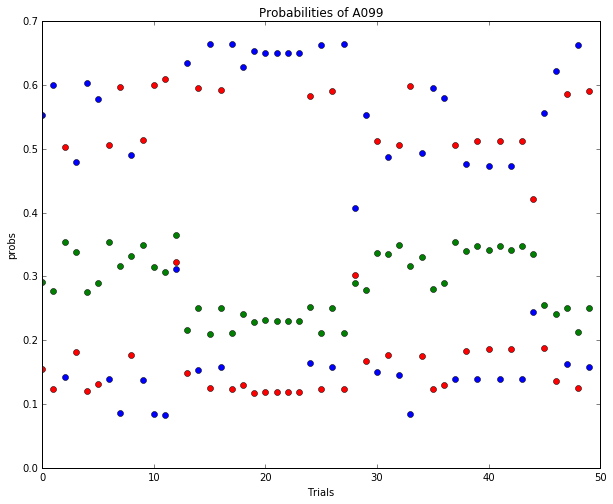

In [16]:
sample = 50
for ratname in probabilities.keys():
    probs = probabilities[ratname]
    plt.plot(probs[0,:sample,0],'bo')
    plt.plot(probs[0,:sample,1],'ro')
    plt.plot(probs[0,:sample,2],'go')
    plt.xlabel('Trials')
    plt.ylabel('probs')
    plt.title('Probabilities of '+ ratname)
    plt.show()

In [17]:
sample = 50
for ratname in preprocessedData.keys():
    ratchoice = preprocessedData[ratname]['valY'][0,:]
    print ratchoice[:sample]
    

[ 1.  1.  2.  2.  2.  0.  2.  0.  0.  1.  1.  2.  1.  2.  2.  1.  1.  2.
  0.  2.  0.  0.  0.  0.  0.  0.  2.  2.  2.  0.  1.  1.  0.  2.  0.  2.
  0.  2.  0.  1.  1.  1.  0.  1.  2.  1.  0.  1.  2.  1.]


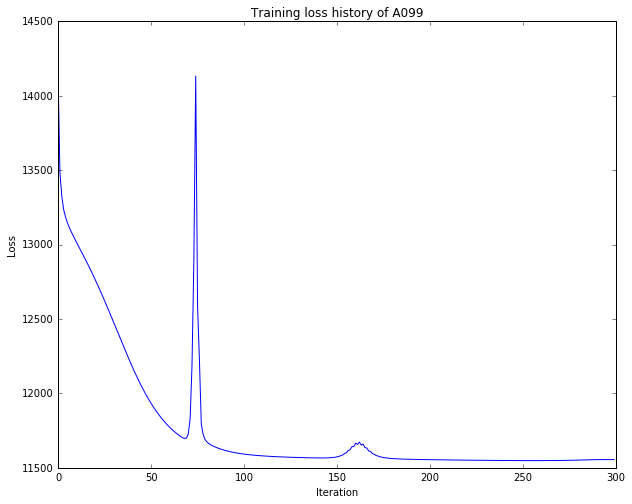

In [18]:
# Plot the training losses
for solver in solvers:
    plt.plot(solver.loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training loss history of '+ ratname)
    plt.show()

In [19]:
# Plot the training losses
#for ratname in solvers.keys():
#    plt.plot(solvers[ratname].loss_history)
#    plt.xlabel('Iteration')
#    plt.ylabel('Loss')
#    plt.title('Training loss history of '+ ratname)
#    plt.show()

In [20]:
trial_window = 3
postData = postProcess(choices, probabilities, preprocessedData,trial_window=trial_window)
p2a, a2p, p2a2, a2p2 = meanPerformance(postData) 
real_p2a, real_a2p, normalized_real_rat = realRatMeanPerformance(preprocessedData) 

In [21]:
for ratname in normalized_real_rat.keys():
    print "%s rat: %f, logical: %f, sequencial: %f" % (ratname,normalized_real_rat[ratname]['normalized_accuracy'],
                                                      logical_accuracies[ratname], real_accuracies[ratname])

A099 rat: 0.786808, logical: 0.984303, sequencial: 0.542184


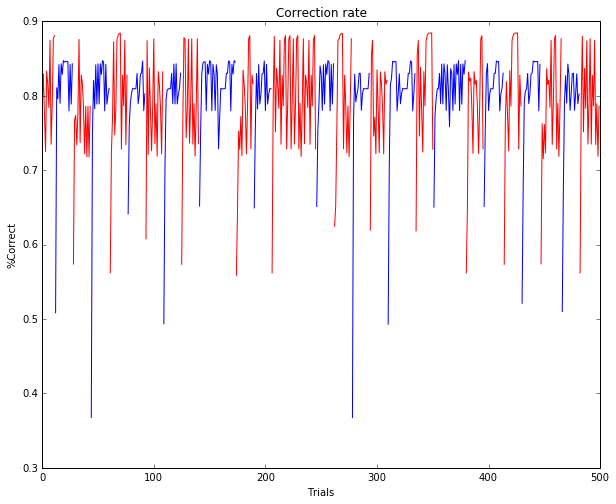

In [22]:
for ratname in postData:
    plt.plot(range(500), postData[ratname]['pro_prob'][:500],color='b')
    plt.plot(range(500), postData[ratname]['anti_prob'][:500],color='r')
    plt.xlabel('Trials')
    plt.ylabel('%Correct')
    plt.title('Correction rate')
    plt.show()

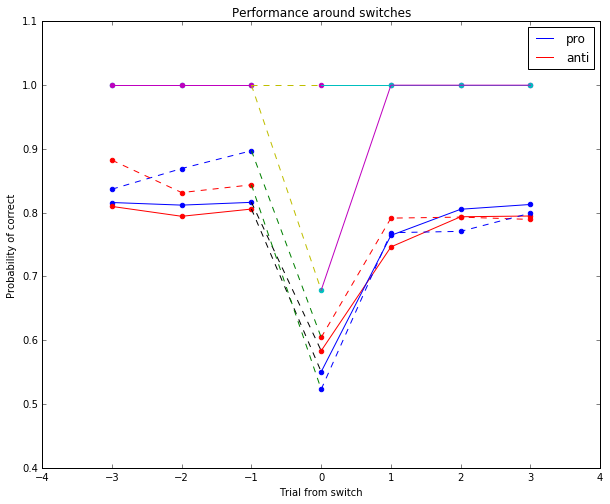

In [23]:
# Plot for normalization
p2aplot, = plt.plot(range(-trial_window, 0), p2a[:trial_window], color='b')
a2pplot, = plt.plot(range(-trial_window, 0), a2p[:trial_window], color='r')
plt.plot(range(trial_window+1), p2a[trial_window:], color='r')
plt.plot(range(trial_window+1), a2p[trial_window:], color='b')
plt.plot([-1,0],p2a[trial_window - 1:trial_window + 1],'k--')
plt.plot([-1,0],a2p[trial_window - 1:trial_window + 1],'k--')
plt.scatter(range(-trial_window, 0), p2a[:trial_window], color='b')
plt.scatter(range(-trial_window, 0), a2p[:trial_window], color='r')
plt.scatter(range(trial_window+1), p2a[trial_window:], color='r')
plt.scatter(range(trial_window+1), a2p[trial_window:], color='b')

# Plot for excluding cpv
plt.plot(range(-trial_window, 0), p2a2[:trial_window], color='c')
plt.plot(range(-trial_window, 0), a2p2[:trial_window], color='m')
plt.plot(range(trial_window+1), p2a2[trial_window:], color='c')
plt.plot(range(trial_window+1), a2p2[trial_window:], color='m')
plt.plot([-1,0],p2a2[trial_window - 1:trial_window + 1],'y--')
plt.plot([-1,0],a2p2[trial_window - 1:trial_window + 1],'y--')
plt.scatter(range(-trial_window, 0), p2a2[:trial_window], color='c')
plt.scatter(range(-trial_window, 0), a2p2[:trial_window], color='m')
plt.scatter(range(trial_window+1), p2a2[trial_window:], color='m')
plt.scatter(range(trial_window+1), a2p2[trial_window:], color='c')

realp2aplot = plt.plot(range(-trial_window, 0), real_p2a[:trial_window], 'b--')
reala2pplot = plt.plot(range(-trial_window, 0), real_a2p[:trial_window], 'r--')
plt.plot(range(trial_window+1), real_p2a[trial_window:], 'r--')
plt.plot(range(trial_window+1), real_a2p[trial_window:], 'b--')
plt.plot([-1,0],real_p2a[trial_window - 1:trial_window + 1],'g--')
plt.plot([-1,0],real_a2p[trial_window - 1:trial_window + 1],'g--')
plt.scatter(range(-trial_window, 0), real_p2a[:trial_window], color='b')
plt.scatter(range(-trial_window, 0), real_a2p[:trial_window], color='r')
plt.scatter(range(trial_window+1), real_p2a[trial_window:], color='r')
plt.scatter(range(trial_window+1), real_a2p[trial_window:], color='b')

plt.legend([p2aplot, a2pplot],["pro","anti"])
plt.xlabel('Trial from switch')
plt.ylabel('Probability of correct')
plt.title('Performance around switches')
plt.show()

In [24]:
#uploadRNN(solvers['Z009'], 'Z009', "High acc but no switch cost feature", None, 5e-5, 4, 0.993295019157)